In [16]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

In [17]:
eye_xml = "cascades\haarcascade_eye.xml"
face_xml = "cascades\haarcascade_frontalface_default.xml"
face_clf = cv2.CascadeClassifier(face_xml)
eye_clf = cv2.CascadeClassifier(eye_xml)

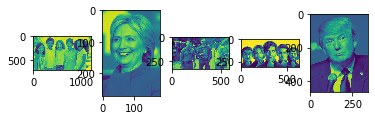

In [18]:
images = []
img_dir = 'images'
for img in os.listdir(img_dir):
    original_img = cv2.imread(os.path.join(img_dir,img))
    gray_img = cv2.cvtColor(original_img,cv2.COLOR_BGR2GRAY)
    images.append(gray_img)
for i in range(len(images)):
    plt.subplot(1,5,i+1)
    plt.imshow(images[i])

In [20]:
faces = []
for img in images:
    temp_face = face_clf.detectMultiScale(img,1.3,5)
    faces.append(temp_face)
    
print(faces[0])

[[284 119 158 158]
 [110 215 134 134]
 [681 133 134 134]
 [881 136 155 155]
 [481 158 130 130]]


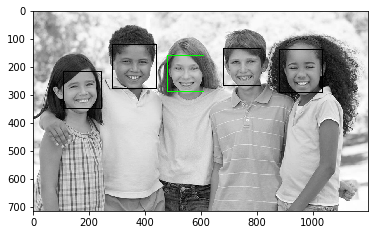

In [27]:
for (x,y,w,h) in faces[0]:
    img = cv2.cvtColor(images[0],cv2.COLOR_GRAY2BGR)
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(img)

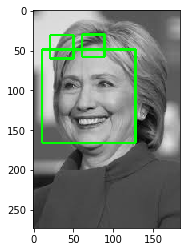

In [33]:
for (x,y,w,h) in faces[1]:
    img1 = cv2.cvtColor(images[1],cv2.COLOR_GRAY2BGR)
    roi = img1[y:y+h,x:x+w]
    cv2.rectangle(img1,(x,y),(x+w,y+h),(0,255,0),2)
    eyes = eye_clf.detectMultiScale(roi)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(img1,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
plt.imshow(img1)

In [ ]:
def detector(image):
    gray_img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    faces = face_clf.detectMultiScale(gray_img,1.3,5)
    for (x,y,w,h) in faces:
        cv2.rectangle(gray_img,(x,y),(x+w,y+h),(0,255,0),2)
        original_roi = image[y:y+h,x:x+w]
        eyes = eye_clf.detectMultiScale(original_roi)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(original_roi,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
            
    image = cv2.flip(image, 1)
    return image

    if faces is ():
        return image

In [ ]:
cap = cv2.VideoCapture()
while True:
    _,frame = cap.read()
    plt.imshow(detector(frame))
    
cap.release()